In [1]:
# [Part 1] Understanding our data

# How many records and how many parameters?
    # 1608 Records, 12 Parameters (Not counting Condition Column)

# Is this a classification or regression issue?
    # Regression. The values are continuous as opposed to 'Male' or 'Female'

# How many different classes in the data?
    # 3 Classes. Normal1, Condition3 and Condition8

# How many records for each condition?
    # Normal1 has 600 records. Condition3 has 480 records. Condition 8 has 528 records.

# How many null values for each condition under each parameter?
    # Refer to cell 'Data Tally'

In [2]:
# Data Tally
import pandas as pd

path = 'Group9 - missingdata.csv' # File Name
df = pd.read_csv(path, index_col = 'Condition') # Load File

# How many records and how many parameters?
print('How many records and how many parameters?')
#print('Number of Records :', len(df.index) * (len(df.columns))) # For No. of Fields
print('Number of Records :', len(df.index)) # For No. of Records
print('Number of Parameters :', len(df.columns))
print('')

# How many records for each condition?
print('How many records for each condition?')
#print(df.groupby(['Condition']).size() * (len(df.columns))) # For No. of Fields
print(df.groupby(['Condition']).size()) # For No. of Records
print('')

# How many null values for each condition under each parameter?
print('How many null values for each condition under each parameter?')

specific = df.groupby('Condition')
n1 = specific.get_group('Normal1').isna().sum()
c3 = specific.get_group('Condition3').isna().sum()
c8 = specific.get_group('Condition8').isna().sum()

dfcountnull = pd.DataFrame({"Normal 1":n1, "Condition 3":c3, "Condition 8":c8})
dfcountnull

How many records and how many parameters?
Number of Records : 134
Number of Parameters : 12

How many records for each condition?
Condition
Condition3    40
Condition8    44
Normal1       50
dtype: int64

How many null values for each condition under each parameter?


,Normal 1,Condition 3,Condition 8
Cylinder heating zone 1,2,2,2
Cylinder heating zone 4,3,2,2
Maximum injection pressure,3,3,2
Mould temperature control unit 1,2,2,2
Cycle time,2,2,2
Cylinder heating zone 5,2,2,2
Injection time,2,2,2
Cylinder heating zone 2,2,2,2
Dosage time,2,2,2
Cylinder heating zone 3,2,2,2


In [3]:
# Data Cleaning
import pandas as pd

path = 'Group9 - missingdata.csv' # File Name
df = pd.read_csv(path, index_col = 'Condition') # Load File

# Check for null on first and last row of Normal 1 and fill with appropriate method
specific = df.groupby('Condition')
n1 = specific.get_group('Normal1')

if n1.head(1).isnull().values.any() == True: # Backward fill if null is found
    n1 = n1.fillna(method='bfill')
    
if n1.tail(1).isnull().values.any() == True: # Forward fill if null is found
    n1 = n1.fillna(method='ffill')

n1 = n1.interpolate() # Interpolate if there are no null on first and last row

# Check for null on first and last row of Condition 3 and fill with appropriate method
specific = df.groupby('Condition')
c3 = specific.get_group('Condition3')

if c3.head(1).isnull().values.any() == True: # Backward fill if null is found
    c3 = c3.fillna(method='bfill')
    
if c3.tail(1).isnull().values.any() == True: # Forward fill if null is found
    c3 = c3.fillna(method='ffill')

c3 = c3.interpolate() # Interpolate if there are no null on first and last row

# Check for null on first and last row of Condition 8 and fill with appropriate method
specific = df.groupby('Condition')
c8 = specific.get_group('Condition8')

if c8.head(1).isnull().values.any() == True: # Backward fill if null is found
    c8 = c8.fillna(method='bfill')
    
if c8.tail(1).isnull().values.any() == True: # Forward fill if null is found
    c8 = c8.fillna(method='ffill')

c8 = c8.interpolate() # Interpolate if there are no null on first and last row

# Stack all clean data together
dfclean = pd.concat([n1, c3, c8])
dfclean = dfclean.round(3)

#Save to CSV
dfclean.to_csv('Group9 - cleandata' + '.csv', index=True)

#Save to Excel
dfclean.to_excel('Group9 - cleandata' + '.xlsx', index=True)

In [4]:
# [Part 2] Statistical Analysis of cleaned data

# Calculate Mean, Median, Mode, Range and Standard Deviation of data
    # Refer to respective cell's 'Calculate Mean, Median, Mode, Range and Standard Deviation of data'

# Use correlation analysis for the different parameters to find correlations and analysis result
    # Refer to cell 'Correlation Analysis'

In [5]:
# Calculate Mean, Median, Mode, Range and Standard Deviation
import pandas as pd

path2 = 'Group9 - cleandata.csv' # File Name
cleandf = pd.read_csv(path2, index_col = 'Condition') # Load File

# Variable declaration
cdfn = cleandf.filter(like = 'Normal', axis = 0)
cdf3 = cleandf.filter(like = '3', axis = 0)
cdf8 = cleandf.filter(like = '8', axis = 0)

# Create dataframe with calculated parameters for Normal 1
cdfn_data = pd.DataFrame({'N1 Mean':round(cdfn.mean(), 3), 'N1 Median':round(cdfn.median(), 3), 'N1 Range':round(cdfn.max() - cdfn.min(), 3), 'N1 Std':round(cdfn.std(), 3)})

cdfnMode = round(cdfn.mode().head(1).transpose(),3) # To get mode
cdfnMode.columns = ['N1 Mode'] # Rename column
cdfn_data = pd.concat([cdfn_data, cdfnMode], axis = 1) # Combine
cdfn_data = cdfn_data[['N1 Mean', 'N1 Median', 'N1 Mode', 'N1 Range', 'N1 Std']]

# Create dataframe with calculated parameters for Condition 3
cdf3_data = pd.DataFrame({'C3 Mean':round(cdf3.mean(), 3), 'C3 Median':round(cdf3.median(), 3), 'C3 Range':round(cdf3.max() - cdf3.min(), 3), 'C3 Std':round(cdf3.std(), 3)})

cdf3Mode = round(cdf3.mode().head(1).transpose(),3) # To get mode
cdf3Mode.columns = ['C3 Mode'] # Rename column
cdf3_data = pd.concat([cdf3_data, cdf3Mode], axis = 1) # Combine
cdf3_data = cdf3_data[['C3 Mean', 'C3 Median', 'C3 Mode', 'C3 Range', 'C3 Std']]

# Create dataframe with calculated parameters for Condition 8
cdf8_data = pd.DataFrame({'C8 Mean':round(cdf8.mean(), 3), 'C8 Median':round(cdf8.median(), 3), 'C8 Range':round(cdf8.max() - cdf8.min(), 3), 'C8 Std':round(cdf8.std(), 3)})

cdf8Mode = round(cdf8.mode().head(1).transpose(),3) # To get mode
cdf8Mode.columns = ['C8 Mode'] # Rename column
cdf8_data = pd.concat([cdf8_data, cdf8Mode], axis = 1) # Combine
cdf8_data = cdf8_data[['C8 Mean', 'C8 Median', 'C8 Mode', 'C8 Range', 'C8 Std']]

# Combine all data
cdfcom_data = pd.concat([cdfn_data, cdf3_data, cdf8_data], axis = 1)

# Sort parameters so easier to see
cdfcom_data = cdfcom_data.sort_index()

# Rearrange columns
cdfcom_datas = cdfcom_data[['N1 Mean', 'C3 Mean', 'C8 Mean',
                            'N1 Median', 'C3 Median', 'C8 Median',
                            'N1 Mode', 'C3 Mode', 'C8 Mode',
                            'N1 Range', 'C3 Range', 'C8 Range',
                            'N1 Std', 'C3 Std', 'C8 Std']]

cdfcom_datas

,N1 Mean,C3 Mean,C8 Mean,N1 Median,C3 Median,C8 Median,N1 Mode,C3 Mode,C8 Mode,N1 Range,C3 Range,C8 Range,N1 Std,C3 Std,C8 Std
Cycle time,28.937,28.762,28.967,28.980,28.714,28.871,28.392,27.728,27.704,2.850,2.788,2.672,0.893,0.930,0.812
Cylinder heating zone 1,278.890,281.076,280.854,278.730,281.275,280.670,266.100,286.310,266.200,27.050,26.720,26.590,8.369,7.953,7.821
Cylinder heating zone 2,295.497,295.484,294.723,295.035,295.580,293.840,294.970,284.320,280.660,29.310,26.270,28.690,8.408,8.633,9.028
Cylinder heating zone 3,307.662,307.502,308.778,307.235,305.345,307.630,294.720,300.570,307.630,30.640,28.320,30.100,9.005,8.329,9.126
Cylinder heating zone 4,311.224,309.298,314.449,313.375,309.315,315.315,294.770,311.870,294.510,29.520,29.860,30.770,7.915,8.386,8.165
Cylinder heating zone 5,316.538,320.638,314.606,319.265,321.680,314.465,302.440,323.580,299.420,31.230,23.530,30.600,9.886,7.044,8.730
Dosage time,2.944,2.864,2.862,2.941,2.866,2.875,2.866,2.698,2.816,0.328,0.340,0.322,0.084,0.092,0.086
Injection time,0.237,0.216,0.308,0.239,0.208,0.312,0.204,0.208,0.344,0.100,0.080,0.120,0.030,0.023,0.033
Material cushion,0.944,1.059,1.011,0.947,1.066,1.013,0.937,1.015,1.032,0.115,0.138,0.123,0.025,0.035,0.039
Maximum injection pressure,1534.605,1543.647,1389.435,1538.085,1551.310,1398.430,1440.630,1562.210,1311.990,186.110,163.440,164.240,50.186,46.719,43.638


In [6]:
# Correlation Analysis (Do not confuse with HEATMAP)
import pandas as pd

path3 = 'Group9 - cleandata.csv' # File Name
corr = pd.read_csv(path3) # Load File

# Plot correlation matrix (Table Form)
corrmat = corr.corr()
corrmat.style.background_gradient(cmap='coolwarm')

,Cylinder heating zone 1,Cylinder heating zone 4,Maximum injection pressure,Mould temperature control unit 1,Cycle time,Cylinder heating zone 5,Injection time,Cylinder heating zone 2,Dosage time,Cylinder heating zone 3,Switch-over volume,Material cushion
Cylinder heating zone 1,1.000000,0.000420,-0.089930,-0.031799,0.079397,0.052326,-0.003577,0.005607,-0.116159,0.113116,0.009356,0.132771
Cylinder heating zone 4,0.000420,1.000000,-0.254008,-0.016617,0.008316,0.051775,0.221999,-0.118779,0.072189,0.040819,-0.124077,-0.054102
Maximum injection pressure,-0.089930,-0.254008,1.000000,0.131772,-0.019141,0.201270,-0.658994,0.034792,0.131943,-0.098542,0.110170,-0.019183
Mould temperature control unit 1,-0.031799,-0.016617,0.131772,1.000000,-0.010818,0.196370,-0.145895,-0.159035,-0.109572,-0.042232,-0.038418,0.036074
Cycle time,0.079397,0.008316,-0.019141,-0.010818,1.000000,-0.082244,0.106100,-0.069331,-0.025174,0.066300,-0.028555,-0.035220
Cylinder heating zone 5,0.052326,0.051775,0.201270,0.196370,-0.082244,1.000000,-0.270396,-0.019248,-0.057586,-0.076200,0.043129,0.055038
Injection time,-0.003577,0.221999,-0.658994,-0.145895,0.106100,-0.270396,1.000000,-0.020365,-0.070993,0.124197,-0.233457,0.010624
Cylinder heating zone 2,0.005607,-0.118779,0.034792,-0.159035,-0.069331,-0.019248,-0.020365,1.000000,0.154732,0.016549,0.184888,0.032265
Dosage time,-0.116159,0.072189,0.131943,-0.109572,-0.025174,-0.057586,-0.070993,0.154732,1.000000,0.032898,-0.079428,-0.289626
Cylinder heating zone 3,0.113116,0.040819,-0.098542,-0.042232,0.066300,-0.076200,0.124197,0.016549,0.032898,1.000000,-0.120962,0.052636


In [7]:
# [Part 3] Data Visualization

# Create a Histogram and Line chart for each parameter
    #

# Based on the visual data, find out which parameter is important to affect product quality
    #

# You can use pair plots, scatter or other methods
    #

In [8]:
# [Part 4] Data Modelling, Error Analysis and Model Testing

# Notes
    # Target is the class (Normal1, Condition3, Condition8) to predict.
    # We are using parameters to predict a target
    # We have 50 rows of normal, 40 rows of condition3 and 44 rows of condition8. Data is imbalanced.
    # Use Stratified K Fold for better accuracy
    # On the HEATMAP, y axis is target and x axis is predicted value.
    
# Stratified K Fold?
    # K-fold's purpose is to prevent the classifier from over fitting the training data.
    # Each fold you keep 1 test data and the rest is train data. Use test data to verify accuracy
    # Average predictions to see how the classifier is performing

# Test model accuracy
    # Fold 1: 1.00
    # Fold 2: 0.96
    # Fold 3: 0.96
    # Fold 4: 0.93
    # Fold 5: 0.92
    # Overall (Mean of all folds): 0.94 <--- Accuracy of our model

Accuracy of fold 1 = 1.0
TRAIN: [  0   1   2   3   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  26  27  28  29  30  31  32  33  34  35  38  40  42
  44  47  48  49  50  51  53  54  55  56  57  58  59  61  62  63  64  65
  66  67  68  69  71  72  74  75  76  77  78  79  80  81  82  83  85  86
  90  91  92  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 110 111 112 114 116 117 118 119 121 122 124 127 129 130 131 132 133] 
TEST: [  4   5  25  36  37  39  41  43  45  46  52  60  70  73  84  87  88  89
  93 109 113 115 120 123 125 126 128] 

Accuracy of fold 2 = 0.96
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18
  20  22  23  24  25  26  28  30  31  32  34  35  36  37  38  39  41  43
  45  46  48  49  51  52  53  54  55  56  57  58  59  60  62  63  65  66
  67  69  70  71  72  73  75  77  79  80  81  83  84  85  86  87  88  89
  90  92  93  94  95  96  98 101 102 103 105 106 107 108 109 110 111 112
 113 114 115 11

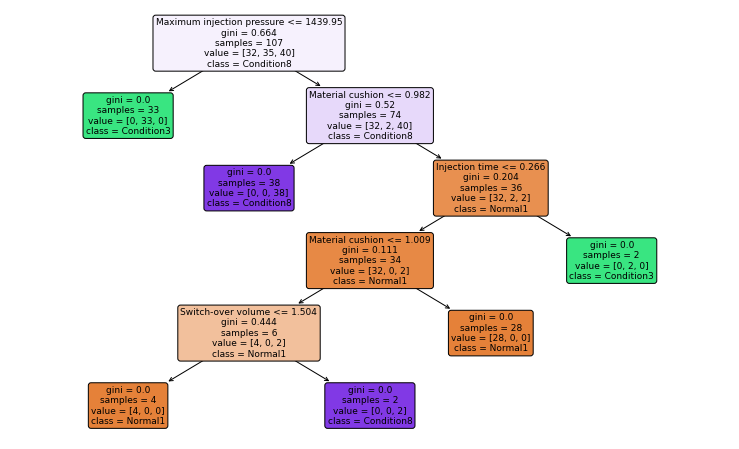

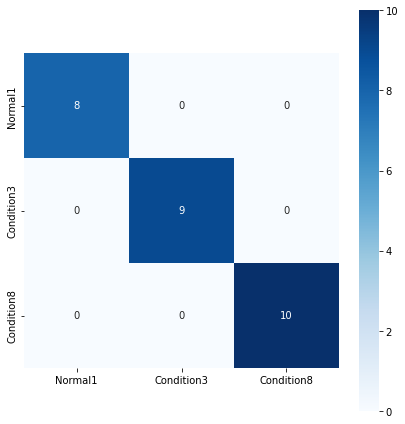

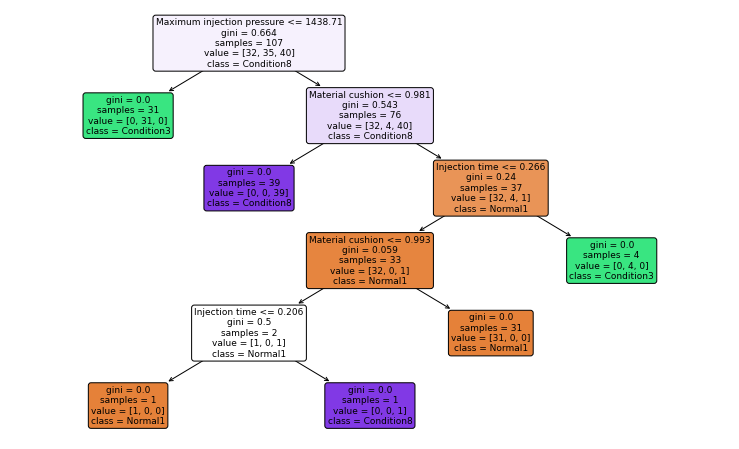

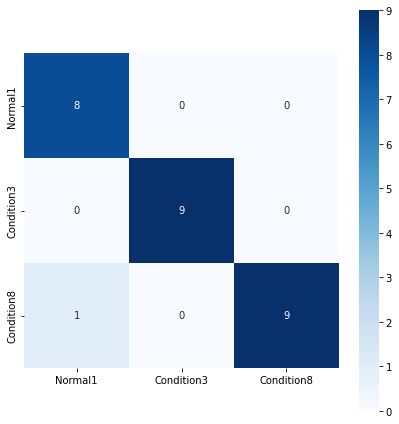

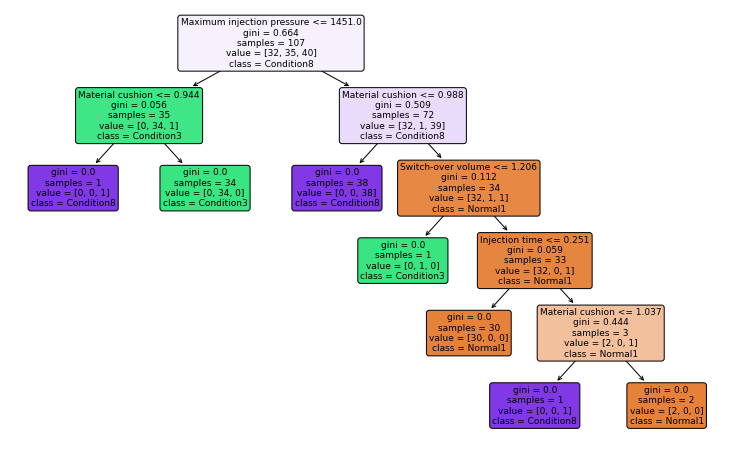

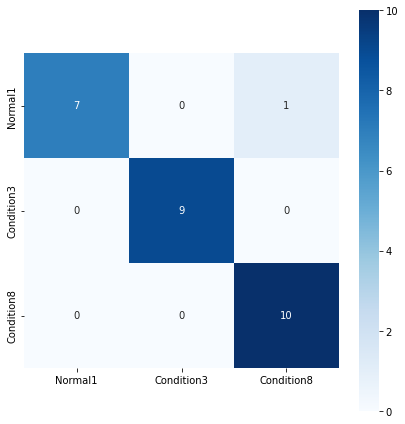

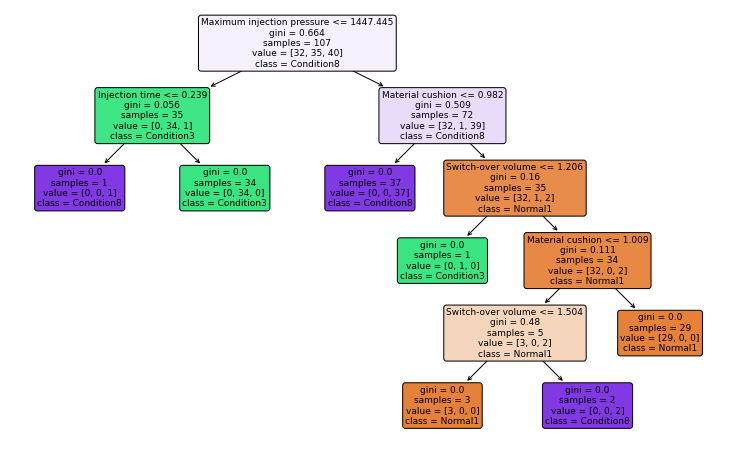

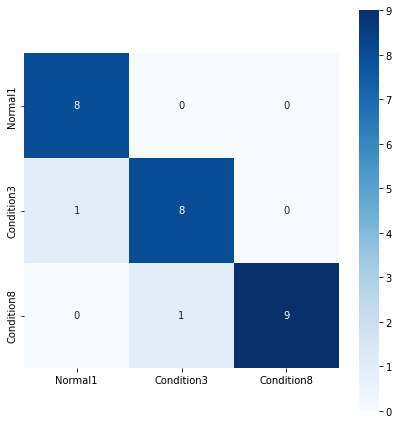

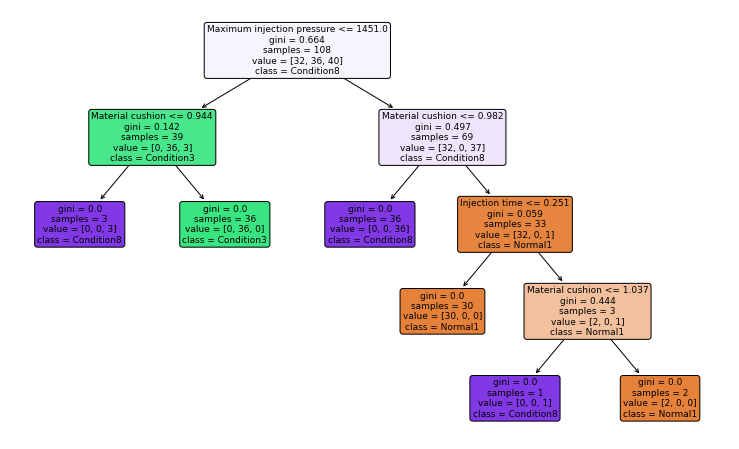

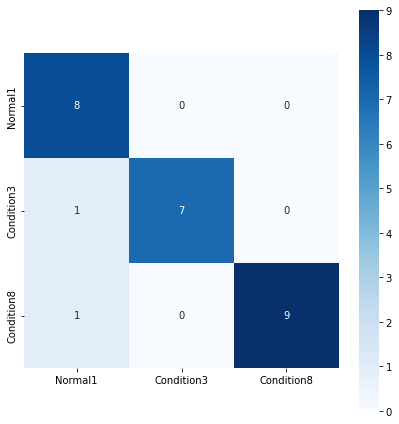

In [11]:
# Decision Tree Classifier
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs
from sklearn import tree

path4 = 'Group9 - cleandata.csv' # File Name
decision = pd.read_csv(path4) # Load File
decisionN = decision[["Maximum injection pressure", "Injection time", "Switch-over volume", "Material cushion"]]

# Load data
X = decisionN

decision_y = decision['Condition'].to_numpy()
y = pd.DataFrame(decision_y)

feature_names = list(decisionN)
target_names = decision['Condition'].unique()

# Create Save Path
path = os.getcwd()
savePath = path + '\DT Results'

# Define Decision Model
model_name = 'Decision Tree'
model = dt(random_state = 0)

# Split data into 5 folds
cv = sk(n_splits = 5, shuffle = True, random_state = 1)

# Accuracy List
accuracy_l = []

# Result List
result_matrix =[]

x = 1 # Initialize for labelling fold / iteration

# Split data to Train and Test
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    
    # Fit Decision Tree Model and Predict y_p
    model.fit(X_tr, y_tr)
    y_p = model.predict(X_v)

    # Calculate Accuracy
    accuracy = np.mean(acs(y_v, y_p)).round(2)
    print("Accuracy of fold", x, "=", accuracy)
    accuracy_l.append(accuracy)

    # To vizualize the train/test split in index list format. Comment to remove
    print("TRAIN:", tr_i, "\nTEST:", te_i, '\n')
    
    # Plot and Save Decision Tree
    fig = plt.figure(figsize=(13, 8))
    tree.plot_tree(model, feature_names = feature_names, class_names = target_names, filled = True, rounded = True, fontsize = 9)
    plt.savefig(savePath + '\\' + 'Group 9_fold' + str(x) + '_decisionTree.png')

    # Use Confusion Matrix to compare y_v and y_p, Plot and Save Confusion Matrix
    fig, ax = plt.subplots(figsize=(6,6))

    # Use Heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot = True, fmt = 'd', cmap = 'Blues', square = True, xticklabels = target_names, yticklabels = target_names)
    plt.tight_layout()
    plt.savefig(savePath + '\\' + 'Group 9_fold' + str(x) + '_confusionMatrix.png')

    # Reset the label to original and save the original test data + prediction into a .csv file
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)

    result_matrix = pd.concat([X_v, y_v], axis = 1, ignore_index = True)
    result_matrix.loc[:,5] = y_p

    result_matrix.to_csv(savePath + '\\' + 'Group 9_cv_fold' + str(x) + '.csv', index = False)
    
    x = x + 1

In [10]:
# Mean Accuracy Score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score : %s' % (model_name, "{:.2f}".format(m_sc)))

Decision Tree score : 0.94
